> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.
● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.
● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.



### Question(s) for Analysis
> Top 10 Directors that have directed the most High budget movies
> Which Genre is Popular from year to year?

In [39]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [40]:
# Upgrade pandas to use dataframe.explode() function. 0.25.0
!pip install --upgrade pandas==0.24.0

Requirement already up-to-date: pandas==0.24.0 in /opt/conda/lib/python3.6/site-packages (0.24.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [41]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
pd.set_option('display.max_columns', None)  #to view all the columns of the dataset

df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [43]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning 

In [44]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['budget', 'revenue', 'id', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline', 'keywords', 'production_companies'],axis= 1, inplace= True)

The following columns were dropped because they were not deemed fit for the analysis to be carried out:
1. id
2. imdb_id
3. homepage
4. overview
5. release_date
6. tagline
7. keyword
8. production_companies

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


In [46]:
df.dropna(inplace= True)  #drop all null rows in the dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10732 non-null float64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
budget_adj        10732 non-null float64
revenue_adj       10732 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1006.1+ KB


All the rows with missing columns were dropped.

In [48]:
df[df.duplicated()] #selects duplicate rows

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0


In [49]:
df.drop_duplicates(inplace= True)  #drops duplicate rows

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10731 non-null float64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1006.0+ KB


The blocks of code prior to this cell were checking for duplicate row, one duplicate row was found and dropped.

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (Top 10 Directors that have directed the most High budget movies!)

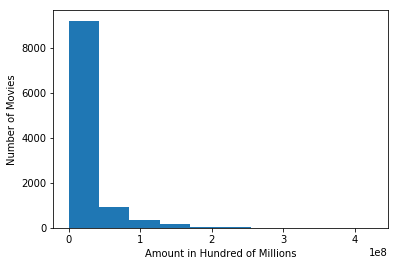

In [51]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def plot_chart(df, chart_kind):
    """create any specified chart."""
    return df.plot(kind= chart_kind)

ax = plot_chart(df.budget_adj, 'hist')
ax.set_xlabel('Amount in Hundred of Millions')
ax.set_ylabel('Number of Movies');

In [52]:
high_budget = df[df['budget_adj'] >= 100_000_000]  #masking to get high budget movies

high_budget.head()

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [53]:
high_budget.groupby('release_year').agg({'original_title': 'count'})

,original_title
release_year,
1962,2
1963,2
1964,1
1965,1
1966,1
1967,2
1970,2
1971,1
1976,1


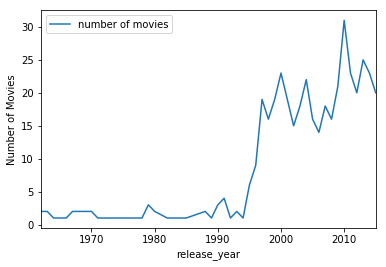

In [54]:
#ax = high_budget.groupby('release_year').agg({'original_title': 'count'}).plot()
ax= plot_chart(high_budget.groupby('release_year').agg({'original_title': 'count'}), 'line')
ax.set_ylabel('Number of Movies')
ax.legend(['number of movies']);

In [55]:
budget_group = high_budget.groupby('director').agg({'original_title': 'count', 'budget_adj': 'sum'}).nlargest(10,'original_title')

budget_group.rename(columns= {'original_title': 'Number_of_Movies', 'budget_adj': 'Cumulative_budget'}, inplace= True)

budget_group['Cumulative_budget'] = budget_group['Cumulative_budget'].astype(int)  #converts the 'cumulative_budget' column to integer.
budget_group

,Number_of_Movies,Cumulative_budget
director,,
Michael Bay,9,1451406867
Ridley Scott,8,1053604050
Roland Emmerich,7,1011792160
Steven Spielberg,7,924808989
Peter Jackson,6,1158797315
Robert Zemeckis,6,885692880
Ron Howard,6,779446169
Tim Burton,6,888322172
Christopher Nolan,5,904266114


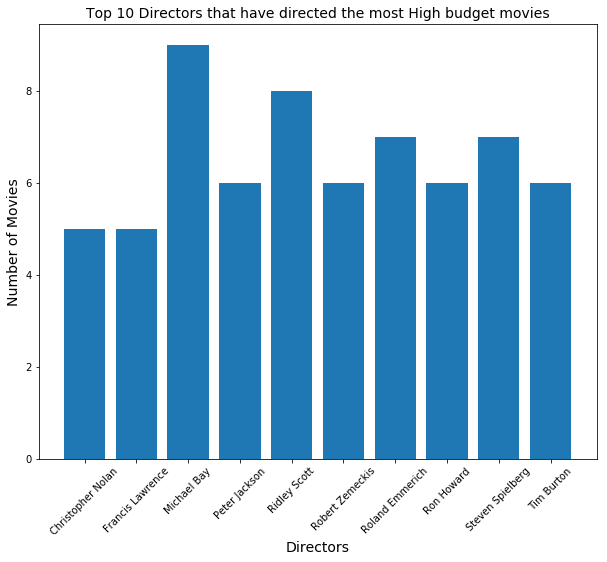

In [56]:
fig, ax = plt.subplots(figsize= (10,8))
ax.bar(budget_group.index, budget_group['Number_of_Movies'])
ax.set_title('Top 10 Directors that have directed the most High budget movies', fontsize= 14)
ax.set_xlabel('Directors', fontsize= 14)
ax.set_ylabel('Number of Movies', fontsize= 14)

x = plt.gca().xaxis    # rotates the x-axis tick label 45 degree.
for item in x.get_ticklabels():
    item.set_rotation(45)

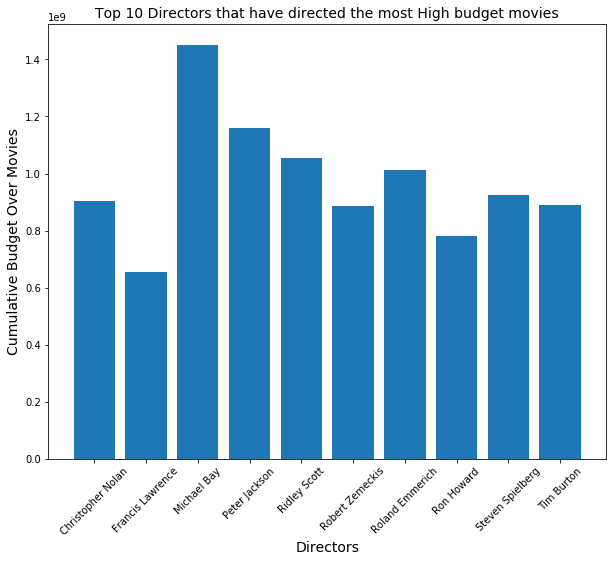

In [57]:
fig, ax = plt.subplots(figsize= (10,8))
ax.bar(budget_group.index, budget_group['Cumulative_budget'])
ax.set_title('Top 10 Directors that have directed the most High budget movies', fontsize= 14)
ax.set_xlabel('Directors', fontsize= 14)
ax.set_ylabel('Cumulative Budget Over Movies', fontsize= 14)

x = plt.gca().xaxis        # rotates the x-axis tick label 45 degree.
for item in x.get_ticklabels():
    item.set_rotation(45)

It was observed in the distribution of budget there are a lot more low budget movies, so i created a mask to select the high budget movies and then use a groupby with an aggregate to calculate the number of movies they have directed and cumulative budget over those movies to investigate the top 10 directors when it comes to directing high budget movies.

Also, A groupby was used to determine the number of high budget movie created per year.

### Research Question 2  (Which Genre is Popular from year to year!)

In [58]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])    #splits the 'genres' column and selected the first genre.
group_df = df.groupby(['release_year', 'genres']).agg({'original_title': 'count'}).reset_index()  #group the dataframe by release_year and genres with a count aggregate calculating the number of movie. 
new_group = group_df.sort_values('original_title', ascending= False).groupby('release_year').first() #sorts the dataframe by count of 'original_title', then groups by the release_year and then select the first value for all group.

new_group.rename(columns= {'original_title': 'Number_of_movie'}, inplace= True)  
new_group

,genres,Number_of_movie
release_year,,
1960,Action,8
1961,Comedy,8
1962,Drama,11
1963,Comedy,9
1964,Drama,10
1965,Drama,11
1966,Action,11
1967,Comedy,11
1968,Drama,9


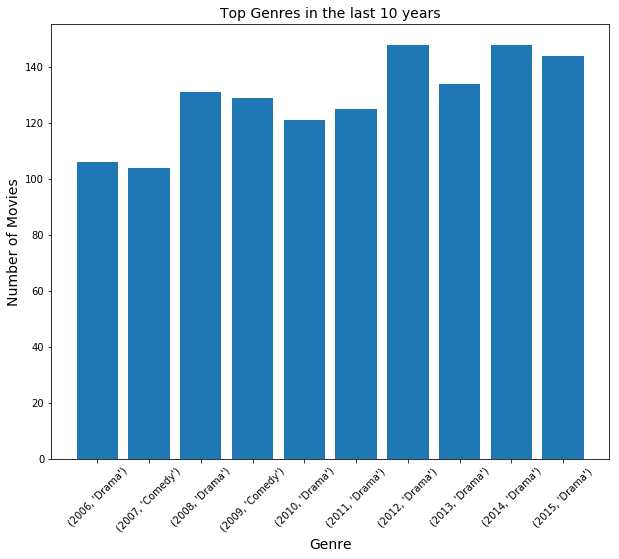

In [59]:
year = new_group.tail(10).index
amt_movies = new_group.tail(10)['Number_of_movie'].values
genre = new_group.tail(10)['genres'].values

label = [(i,j) for i,j in zip(year,genre)]  #creates a list of tuples containing the year and the popular genre.

fig, ax = plt.subplots(figsize= (10,8))
ax.bar(year, amt_movies)
ax.set_title('Top Genres in the last 10 years', fontsize= 14)
ax.set_ylabel('Number of Movies', fontsize= 14)
ax.set_xlabel('Genre', fontsize= 14)
ax.set_xticks(year)
ax.set_xticklabels(labels= label);

x = plt.gca().xaxis        # rotates the x-axis tick label 45 degree.
for item in x.get_ticklabels():
    item.set_rotation(45)


<a id='conclusions'></a>
## Conclusions



1. The highest number of high budget movie created in a year was in 2010, with a record 31 high budget movie and there was an unprecedented raise in the number of high budget movies from 1997 to 2015.

2. It was found out the **Michael Bay** has directed the most high budget movies and he also has the highest cumulative budget over those movies.

<u>The top 10 director by Number of high budget movies directed</u>

- Michael Bay	    -    9
- Ridley Scott	    -    8
- Roland Emmerich	-    7
- Steven Spielberg  -    7
- Peter Jackson	    -    6
- Robert Zemeckis	-    6
- Ron Howard	    -    6
- Tim Burton	    -    6
- Christopher Nolan	-    5
- Francis Lawrence  -    5

<u>The top 10 director by Cumulative budget over movies</u>


- Michael Bay	    -  \$1,451,406,867
- Peter Jackson		-  \$1,158,797,315
- Ridley Scott	    -  \$1,053,604,050
- Roland Emmerich	-  \$1,011,792,160
- Steven Spielberg	-  \$924,808,989
- Christopher Nolan	-  \$904,266,114
- Tim Burton		-  \$888,322,172
- Robert Zemeckis	-  \$885,692,880
- Ron Howard  	    -  \$779,446,169
- Francis Lawrence	-  \$653,427,268

With this information the average budget of each directed movie can be calculated per director.

3. It was observed that **Comedy** has been the most popular genre in the past *10 years*, Coming up top **8** times in the the last 10 years. The comedy genre peak it highest number of movies in the year 2014 with 140 comedy movies created that year.

**<u>Limitation </u>**

The genres column contains entries for each row that are separated by a pipe(|) which makes it difficult to work with, so i had to assume the first genre for each row is the predominate one.

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0